In [ ]:
## Script para leer perfiles de densidad lineal y graficar para articulos cientificos

In [10]:
# Importacion de librerias

import numpy as np
import pandas as pd

from scipy.optimize import least_squares
from scipy import optimize
from scipy.optimize import curve_fit

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.axes_grid1 import make_axes_locatable
from collections import OrderedDict

import os
from math import *
from matplotlib.ticker import MultipleLocator, AutoMinorLocator


**<font color=blue size=5>1. Basal Heptanoato - Sodio** 

In [11]:
#### PROCESO DE GRAFICACIÓN ####
x = np.array([0, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25, 3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15, 4.25, 4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.15, 6.25, 6.35, 6.45, 6.55, 6.65, 6.75, 6.85, 6.95, 7.05, 7.15, 7.25, 7.35, 7.45, 7.55, 7.65, 7.75, 7.85, 7.95, 8.05, 8.15, 8.25, 8.35, 8.45, 8.55, 8.65, 8.75, 8.85, 8.95, 9.05, 9.15, 9.25, 9.35, 9.45, 9.55, 9.65, 9.75, 9.85, 9.95, 10.05])
y_Na = np.array([0, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 5.4674, 381.0435, 2670.0308, 3941.7772, 2471.5070, 1634.7675, 1645.5313, 1990.5973, 1975.0202, 1675.2556, 965.9553, 492.1728, 222.2352, 99.1630, 80.5244, 93.7123, 150.4761, 198.8273, 318.6703, 423.3855, 556.5459, 690.4061, 808.8085, 969.5667, 1045.6136, 1115.9128, 1151.6979, 1162.4878, 1155.3548, 1169.5548, 1175.0381, 1121.1309, 1024.2338, 901.9800, 725.8859, 609.2925, 499.2082, 436.0224, 412.7767, 409.7236, 414.8946, 473.0830, 505.5557, 554.8254, 566.6763, 559.5838, 610.4914, 587.6756, 602.6593, 604.5336, 616.5646, 599.5798, 576.1207, 580.7656, 561.4757, 544.9342, 518.0526, 509.9219, 484.5283, 469.0822, 461.5956, 466.9120, 456.5704, 466.2548, 456.9405, 470.1918, 453.1462, 458.4887, 451.7682, 441.7002, 440.1612, 436.4745, 435.1627, 435.9192, 434.7266, 422.1317, 419.0273, 420.6712])
y_K = np.array([0, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.7881, 16.4813, 50.3127, 70.7538, 90.7668, 89.4652, 90.6968, 95.2437, 88.3967, 76.7666, 57.0422, 34.3531, 30.3764, 22.3551, 16.3001, 21.5437, 22.1113, 25.8906, 26.8839, 24.7601, 35.6245, 42.8266, 50.9162, 52.0892, 56.1496, 57.4991, 63.5418, 59.3119, 56.0486, 53.2027, 56.6938, 50.9657, 52.5949, 45.7088, 42.3252, 35.5731, 32.4825, 28.6828, 26.8023, 31.8134, 30.5696, 33.1347, 26.8851, 32.3407, 37.9180, 37.3125, 34.9573, 36.2890, 34.5725, 37.2055, 39.5714, 36.4321, 32.0376, 32.1655, 37.8238, 32.0507, 32.7769, 33.3572, 31.8841, 32.7372, 28.2424, 31.3847, 29.9575, 30.8393, 29.4702, 29.5341, 28.2360, 26.4889, 27.6452, 30.9725, 31.2805, 28.4435, 29.0762])
Todo_COO = pd.DataFrame([x , y_Na, y_K]).T
#Todo_COO
x_max_Na = Todo_COO.iloc[Todo_COO.iloc[:,1].idxmax(),0]
x_max_K = Todo_COO.iloc[Todo_COO.iloc[:,2].idxmax(),0]

###### Determinacion de la altura de la interfase



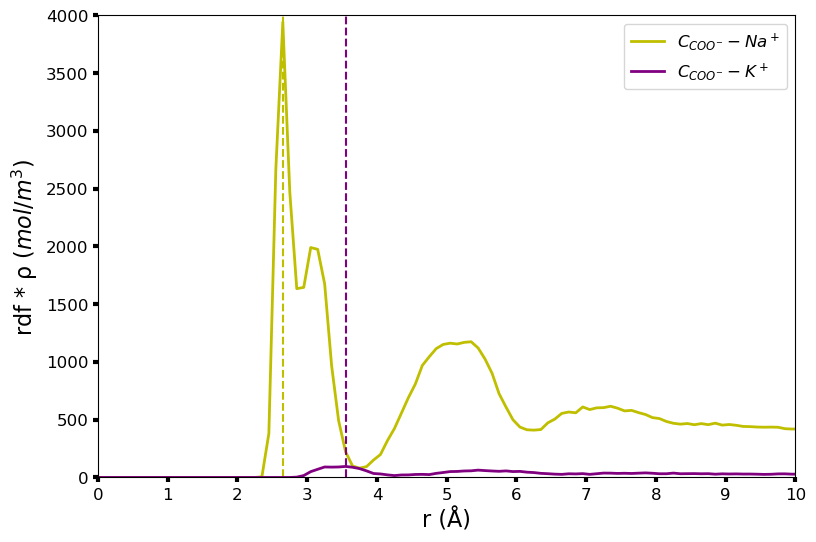

In [12]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rcParams["font.family"] = 'Times New Roman'

ax.plot(x, y_Na, 'y', label='$C_{COO^{-}}-Na^+$', markersize=5, lw=2)
plt.axvline(x_max_Na, color = 'y', linestyle='--')

ax.plot(x, y_K, color ='purple', label='$C_{COO^{-}}-K^+$', markersize=5, lw=2)
plt.axvline(x = x_max_K, color = 'purple', linestyle='--')

ax.legend(loc='best', fontsize=12)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(20000))
ax.tick_params(axis='both', labelsize=12, width=3)
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlim(0, 10)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_ylim(0, 4000)
ax.set_xlabel('r (Å)',  fontsize=16)
ax.set_ylabel('rdf * ρ ($mol/m^3$)', fontsize=16)
fig.savefig("Basal_Na.png", dpi=800)
plt.show()

**<font color=blue size=5>1. Borde Heptanoato - Sodio** 

In [13]:
#### PROCESO DE GRAFICACIÓN ####
x = np.array([0, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25, 3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15, 4.25, 4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.15, 6.25, 6.35, 6.45, 6.55, 6.65, 6.75, 6.85, 6.95, 7.05, 7.15, 7.25, 7.35, 7.45, 7.55, 7.65, 7.75, 7.85, 7.95, 8.05, 8.15, 8.25, 8.35, 8.45, 8.55, 8.65, 8.75, 8.85, 8.95, 9.05, 9.15, 9.25, 9.35, 9.45, 9.55, 9.65, 9.75, 9.85, 9.95, 10.05])
y_Na = np.array([0, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.3920, 354.3202, 2355.5765, 3440.5898, 2239.4288, 1517.4341, 1575.7025, 1819.1689, 1928.5167, 1568.4079, 955.8652, 461.7291, 197.0765, 85.7760, 55.4276, 74.4223, 119.3890, 169.5440, 248.9201, 367.5366, 494.3085, 621.1176, 710.2600, 811.7109, 875.6804, 925.3138, 924.4316, 952.9395, 977.8104, 953.6185, 976.0003, 950.2988, 855.2438, 745.1563, 602.1838, 474.8378, 407.5125, 340.9132, 331.1395, 318.7679, 334.1998, 382.3498, 409.2573, 416.7592, 438.8634, 478.7957, 473.4591, 502.6532, 495.9276, 499.5589, 512.8372, 493.9256, 504.1056, 483.2242, 463.5757, 459.0225, 433.8556, 427.5270, 419.2880, 396.6650, 395.3691, 389.3048, 389.3783, 383.3410, 398.4424, 388.8987, 393.0393, 387.2243, 388.6694, 392.9729, 386.2744, 382.5809, 376.0594, 375.5415, 370.8657, 362.0120, 364.8473, 358.9963])
y_K = np.array([0, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 7.0816, 64.2944, 201.2423, 340.9742, 374.7742, 364.3844, 347.0830, 326.9758, 296.7452, 220.5166, 178.1642, 123.6755, 110.3110, 84.7153, 73.8273, 68.5376, 87.1466, 98.5143, 108.1085, 127.9413, 143.3956, 169.2477, 173.0694, 206.6370, 203.0144, 223.2677, 209.5157, 210.5226, 206.5769, 205.1484, 199.8758, 181.8397, 181.4504, 157.0700, 152.0841, 139.0315, 126.5832, 117.6281, 116.4822, 111.7940, 116.3554, 111.6237, 115.8448, 115.2868, 122.3762, 120.9082, 133.1367, 138.9912, 138.6876, 133.1291, 135.6995, 139.1749, 135.7386, 140.7738, 137.1513, 136.9612, 127.5864, 135.5648, 132.9377, 137.2252, 131.2037, 135.9921, 146.2207, 140.6060, 148.4618, 151.9432, 148.9202, 154.1895, 157.3003, 161.7919, 159.4398, 159.9488, 165.4284])
Todo_COO = pd.DataFrame([x , y_Na, y_K]).T
#Todo_COO
x_max_Na = Todo_COO.iloc[Todo_COO.iloc[:,1].idxmax(),0]
x_max_K = Todo_COO.iloc[Todo_COO.iloc[:,2].idxmax(),0]

###### Determinacion de la altura de la interfase



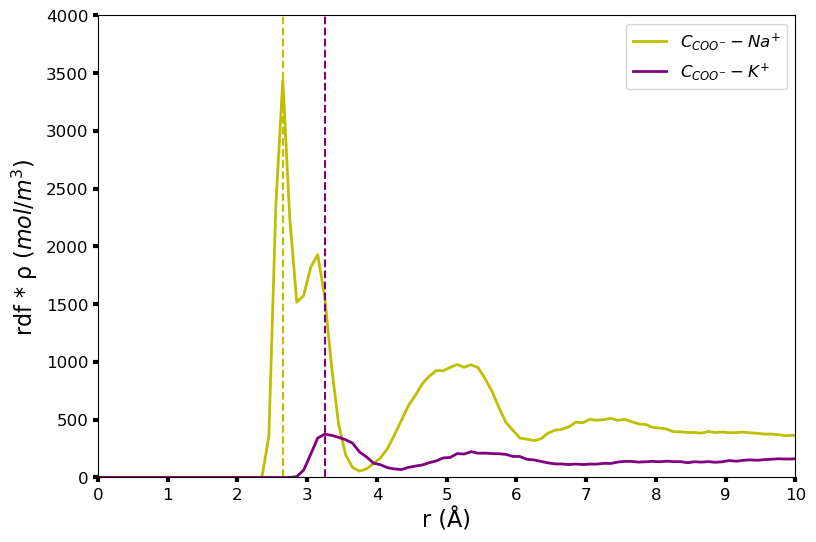

In [14]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rcParams["font.family"] = 'Times New Roman'

ax.plot(x, y_Na, 'y', label='$C_{COO^{-}}-Na^{+}$', markersize=5, lw=2)
plt.axvline(x_max_Na, color = 'y', linestyle='--')

ax.plot(x, y_K, color ='purple', label='$C_{COO^{-}}-K^{+}$', markersize=5, lw=2)
plt.axvline(x = x_max_K, color = 'purple', linestyle='--')

ax.legend(loc='best', fontsize=12)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(20000))
ax.tick_params(axis='both', labelsize=12, width=3)
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlim(0, 10)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_ylim(0, 4000)
ax.set_xlabel('r (Å)',  fontsize=16)
ax.set_ylabel('rdf * ρ ($mol/m^3$)', fontsize=16)
fig.savefig("Borde_Na.png", dpi=800)
plt.show()

**<font color=blue size=5>1. Basal Hexilamonio - Cloro** 

In [15]:
#### PROCESO DE GRAFICACIÓN ####
x = np.array([0, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25, 3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15, 4.25, 4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.15, 6.25, 6.35, 6.45, 6.55, 6.65, 6.75, 6.85, 6.95, 7.05, 7.15, 7.25, 7.35, 7.45, 7.55, 7.65, 7.75, 7.85, 7.95, 8.05, 8.15, 8.25, 8.35, 8.45, 8.55, 8.65, 8.75, 8.85, 8.95, 9.05, 9.15, 9.25, 9.35, 9.45, 9.55, 9.65, 9.75, 9.85, 9.95, 10.05])
y_Cl = np.array([0, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 14.0662, 771.3173, 5158.4771, 8109.9581, 5766.1767, 2748.2242, 1259.9158, 690.7312, 467.9421, 398.6320, 399.8739, 392.2421, 392.7039, 489.6926, 493.4095, 553.6347, 624.2371, 721.2811, 764.9036, 853.6277, 925.6555, 1021.2445, 1046.4463, 1075.6711, 1058.9214, 1005.4851, 947.5280, 885.6384, 806.6930, 771.1030, 668.5918, 589.4227, 545.3207, 514.7032, 511.8934, 510.0666, 510.6809, 522.5058, 540.3377, 559.2425, 575.6036, 586.6585, 601.7443, 605.5650, 608.4039, 599.8932, 602.2966, 605.1147, 587.6899, 566.4390, 558.1258, 551.5179, 539.7744, 510.4825, 517.5934, 493.6961, 491.0818, 489.7239, 494.7875, 495.0158, 506.9609, 496.7654, 487.0686, 495.4170, 488.3523, 477.3904, 487.3327, 483.9927, 464.1210, 481.0931, 471.4480, 461.7308, 453.2242])
y_Ob = np.array([0, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 26.3552, 730.0826, 3152.7824, 5425.1542, 6602.1475, 6279.2176, 4938.3737, 3644.0019, 2531.8787, 1960.0690, 1346.8976, 1075.2485, 800.8188, 661.9599, 542.3652, 552.4848, 555.6207, 656.2979, 968.7663, 1648.4043, 2645.0424, 3710.9056, 4109.2505, 3578.7559, 2662.9884, 1843.9521, 1265.2261, 891.2869, 677.1431, 548.6574, 453.2521, 368.2243, 355.7442, 340.5561, 385.2832, 441.1342, 533.0180, 580.6334, 641.6567, 735.0372, 880.3864, 1212.9338, 1875.5313, 2718.6691, 3356.4318, 3385.4582, 2991.5050, 2334.8418, 1853.0856, 1658.4064, 1594.8468, 1594.5482, 1668.8786, 1680.1719, 1637.7179, 1577.3357, 1481.9905, 1443.4486, 1527.1803, 1772.6952, 1994.2598, 2134.5348, 2160.7389, 2153.5807, 2161.4466, 2180.9096, 2267.7611, 2546.1758, 2833.3821, 3061.7835, 2991.2646, 2721.3043, 2355.1324, 2160.5639, 1962.6263, 1867.0576])
Todo_NH = pd.DataFrame([x , y_Cl, y_Ob]).T
#Todo_COO
x_max_Cl = Todo_NH.iloc[Todo_NH.iloc[:,1].idxmax(),0]
x_max_Ob = Todo_NH.iloc[Todo_NH.iloc[:,2].idxmax(),0]

###### Determinacion de la altura de la interfase



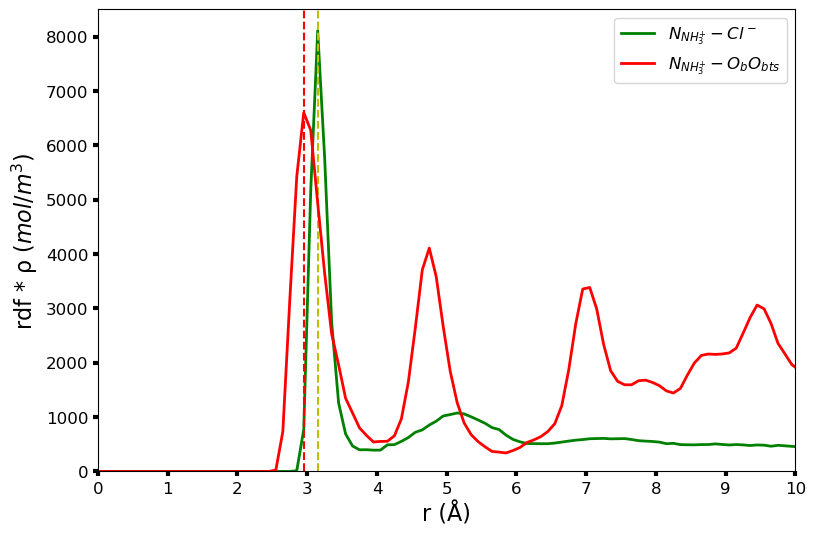

In [16]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rcParams["font.family"] = 'Times New Roman'

ax.plot(x, y_Cl, 'g', label='$N_{NH_{3}^{+}}-Cl^-$', markersize=5, lw=2)
plt.axvline(x_max_Cl, color = 'y', linestyle='--')

ax.plot(x, y_Ob, color ='r', label='$N_{NH_{3}^{+}}-O_{b}O_{bts}$', markersize=5, lw=2)
plt.axvline(x = x_max_Ob, color = 'r', linestyle='--')

ax.legend(loc='best', fontsize=12)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(20000))
ax.tick_params(axis='both', labelsize=12, width=3)
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlim(0, 10)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_ylim(0, 8500)
ax.set_xlabel('r (Å)',  fontsize=16)
ax.set_ylabel('rdf * ρ ($mol/m^3$)', fontsize=16)
fig.savefig("Basal_Cl.png", dpi=800)
plt.show()

**<font color=blue size=5>1. Borde Hexilamonio - Cloro** 

In [17]:
#### PROCESO DE GRAFICACIÓN ####
x = np.array([0, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25, 3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15, 4.25, 4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95, 6.05, 6.15, 6.25, 6.35, 6.45, 6.55, 6.65, 6.75, 6.85, 6.95, 7.05, 7.15, 7.25, 7.35, 7.45, 7.55, 7.65, 7.75, 7.85, 7.95, 8.05, 8.15, 8.25, 8.35, 8.45, 8.55, 8.65, 8.75, 8.85, 8.95, 9.05, 9.15, 9.25, 9.35, 9.45, 9.55, 9.65, 9.75, 9.85, 9.95, 10.05])
y_Cl = np.array([0, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 7.0567, 836.4780, 5273.7659, 8059.6335, 5570.5025, 2725.9115, 1295.4483, 711.3572, 497.8023, 412.0968, 389.4216, 395.6715, 426.6974, 467.6226, 516.6458, 548.9047, 637.4049, 708.2665, 739.1057, 845.7596, 908.2323, 953.3203, 986.2933, 979.2698, 994.9376, 972.5118, 940.6255, 872.2353, 804.2836, 730.7812, 652.5789, 584.0344, 534.1921, 513.1727, 504.9540, 505.5239, 508.9852, 536.1848, 531.0689, 545.6452, 581.6286, 598.3594, 605.6098, 615.3630, 626.9686, 627.6388, 604.2928, 605.4869, 615.8158, 592.9640, 572.3717, 566.4980, 536.1463, 535.9291, 524.4475, 501.8487, 505.9369, 500.4446, 503.3438, 504.7825, 502.3686, 505.8757, 506.9362, 508.0352, 498.5170, 514.3357, 508.5790, 512.7544, 501.9363, 502.6678, 486.0142, 489.2061, 497.4536])
y_Oe = np.array([0, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1276, 0.2451, 0.1177, 0.1132, 0.2179, 0.6294, 0.4044, 0.4874, 0.5644, 0.9082, 0.6142, 1.3570, 1.8047, 1.8259, 2.6903, 2.1595, 3.1035, 4.4092, 4.0060, 5.0744, 6.1432, 7.5217, 8.6389, 8.6339, 10.1111, 10.1714, 11.3608, 13.5376, 13.2373, 14.5477, 16.2746, 19.6685, 20.7119, 22.4218, 22.8962, 25.3226, 28.0069, 29.2040, 33.1878, 36.8260, 34.7334, 41.3461, 42.4905, 47.0541, 48.0776, 54.7140, 58.1349, 62.1257, 66.6487, 71.5426, 75.6061, 80.3419, 86.8372])
Todo_NH = pd.DataFrame([x , y_Cl, y_Oe]).T
#Todo_COO
x_max_Cl = Todo_NH.iloc[Todo_NH.iloc[:,1].idxmax(),0]
x_max_Oe = Todo_NH.iloc[Todo_NH.iloc[:,2].idxmax(),0]

###### Determinacion de la altura de la interfase



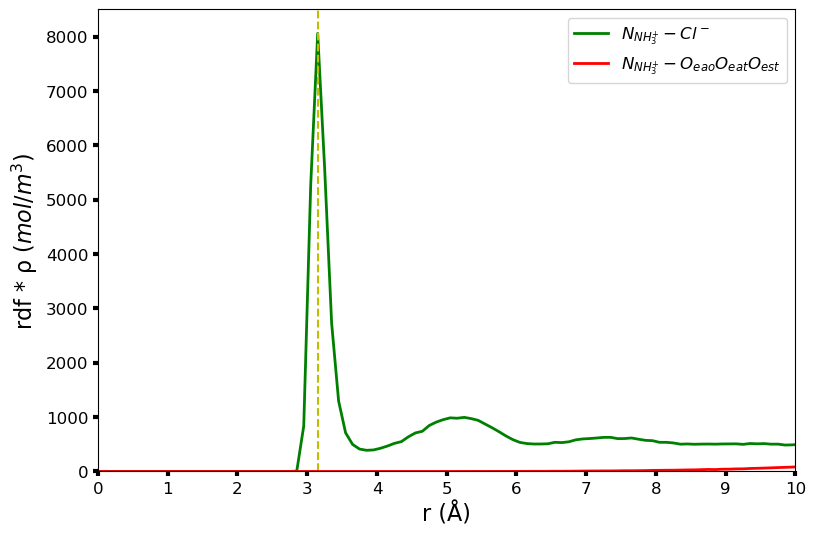

In [18]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rcParams["font.family"] = 'Times New Roman'

ax.plot(x, y_Cl, 'g', label='$N_{NH_{3}^{+}}-Cl^-$', markersize=5, lw=2)
plt.axvline(x_max_Cl, color = 'y', linestyle='--')

ax.plot(x, y_Oe, color ='r', label='$N_{NH_{3}^{+}}-O_{eao}O_{eat}O_{est}$', markersize=5, lw=2)
plt.axvline(x = x_max_Oe, color = 'r', linestyle='--')

ax.legend(loc='best', fontsize=12)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(20000))
ax.tick_params(axis='both', labelsize=12, width=3)
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlim(0, 10)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_ylim(0, 8500)
ax.set_xlabel('r (Å)',  fontsize=16)
ax.set_ylabel('rdf * ρ ($mol/m^3$)', fontsize=16)
fig.savefig("Borde_Cl.png", dpi=800)
plt.show()